<a href="https://colab.research.google.com/github/awhooshingwind/Math254/blob/main/jpierson_wp2_suppl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
import numpy as np
import sympy as sym

from scipy import integrate

import plotly.express as px

sym.init_printing()

Mod 2 Writing Intro

In [3]:
def f(x):
  return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

def g(x,y):
  return np.exp(-x**2 - y**2)

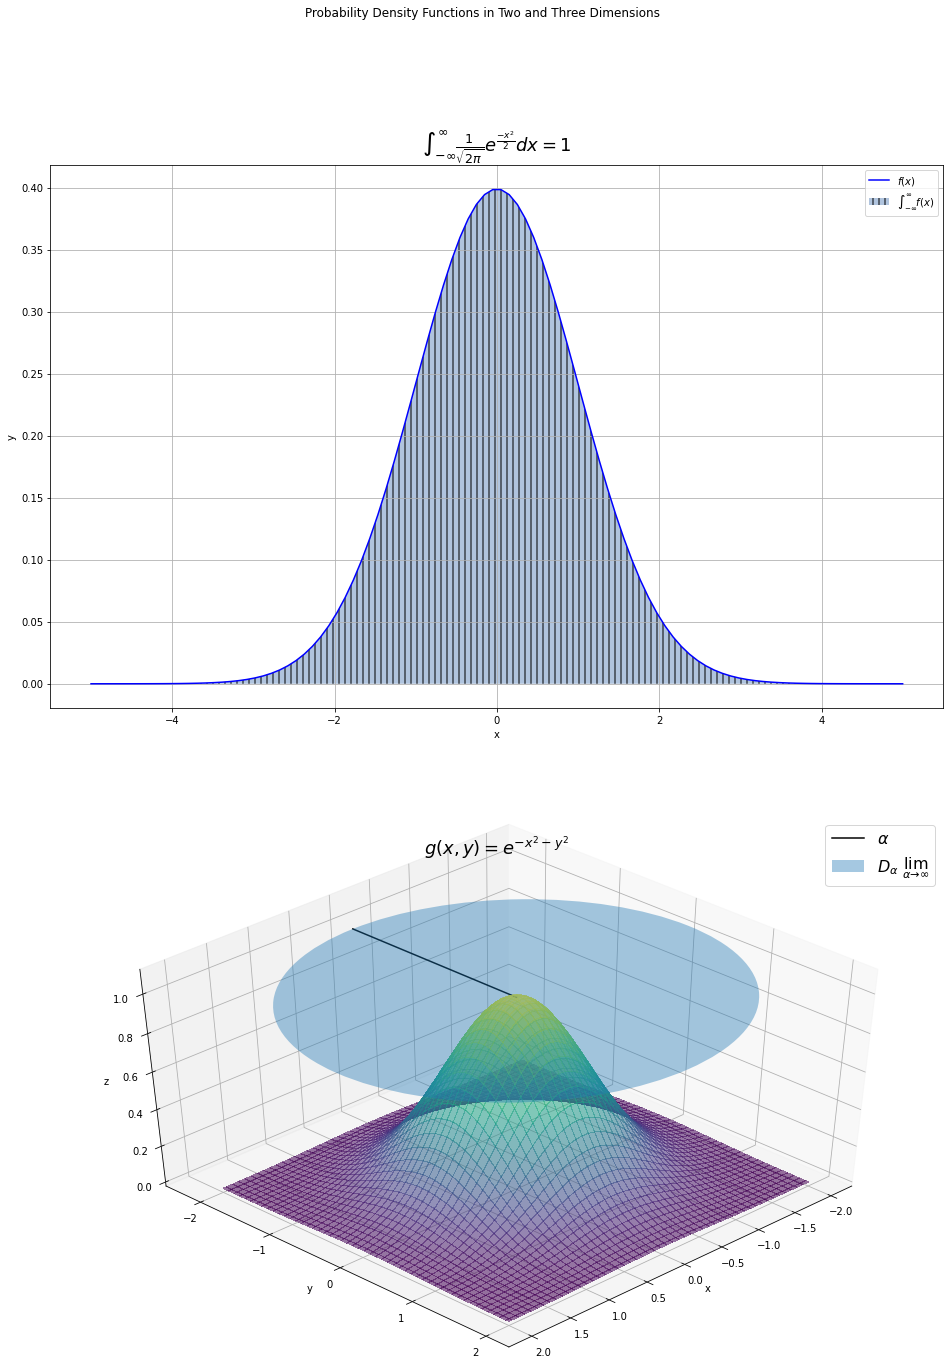

In [4]:
# Set up a figure
A = (16,22)
fig = plt.figure(figsize=A)
fig.suptitle('Probability Density Functions in Two and Three Dimensions')

# First subplot
ax = fig.add_subplot(2, 1, 1, xlabel='x', ylabel='y', title=r'$ \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi}} e^{\frac{-x^2}{2}} dx = 1 $')
ax.title.set_size(18)

# Parameters
xmin = -5
xmax = 5
n = 100

# Make Data
t1 = np.linspace(xmin, xmax, n)
f_vals = f(t1)

# 2D Plotting
ax.plot(t1, f_vals, 'b', label=r'$ f(x) $')
ax.fill_between(t1,0, f_vals, hatch='||', facecolor='lightsteelblue', label= r'$ \int_{-\infty}^{\infty} f(x) $')
plt.legend()
ax.grid(True)

# Establish second subplot
ax = fig.add_subplot(2, 1, 2, projection='3d', azim=45, elev = 45, title=r'$g(x,y) = e^{-x^2-y^2}$', xlabel='x', ylabel='y', zlabel='z')
ax.title.set_size(18)

# Make Data
X = np.linspace(-2, 2, 100)
Y = X
X, Y = np.meshgrid(X, Y)
Z = g(X,Y)

# overlay circle patch
a = 2.2
zmax = 0.9
ax.plot([0,0], [0, -a], zmax+0.1,'k', label=r'$\alpha$')
circ = Circle((0, 0), a, alpha=0.4, label=r'$D_\alpha \  \lim_{\alpha \to \infty}$')
ax.add_patch(circ)

# 3D Plotting
art3d.pathpatch_2d_to_3d(circ, z=zmax+0.1, zdir='z')
surf = ax.plot_surface(X, Y, Z,  linewidth=0.8, cmap=cm.viridis, antialiased=False, alpha=0.55)
ax.set_zlim(0, zmax+0.2)
plt.legend(loc='best', fontsize=16)

plt.show()

### Computation of Improper Integral Probability Density Function

Show that:
$$ \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi}}e^{\frac{-x^2}{2}} dx = 1 $$

consider $ g(x,y) = e^{-x^2-y^2} $

integrate over all of $R^2$
$$ \iint\limits_{R^2} g(x,y) \ dA $$

switch to polar coordinates
$$ g(r,\theta) = e^{-(x^2+y^2)} = e^{-r^2} $$  

$$ \lim_{\alpha \to \infty} \int\limits_{0}^{2 \pi} \int\limits_{-\infty}^{\alpha} g(r,\theta)drd\theta = \int\limits_{0}^{2 \pi} \int\limits_{0}^{\alpha} r e^{-r^2}drd\theta$$
  



$$  $$

perform u-substiution, let $ u = -r^2, \  du = -2 dr $

$$ \int\limits_{0}^{2 \pi} -\frac{1}{2} \int\limits_{0}^{-\alpha} e^u du d\theta $$

compute iterated integral, starting with respect to $ \theta $
$$ \frac{1}{2} \int\limits_{-\alpha}^{0}2\pi  \ e^u du =  \pi \int\limits_{-\alpha}^{0} e^u du $$

undoing u-substitution and evaluating the integral gives

$$ \pi [e^{-r^2} ]_{-\alpha}^{0} $$
taking the limit as $ \alpha \rightarrow \infty $

$$ \lim_{\alpha \to \infty} \pi(e^{-0^2}- e^{-\alpha^2}) = \pi (1-0) = \pi $$

In the spirit of taking limits, we can also integrate $ g(x,y) $ over the entire Cartesian plane using squares so that
$$  \lim_{\alpha \to \infty} \int\limits_{0}^{2 \pi} \int\limits_{-\infty}^{\alpha} g(r,\theta)drd\theta = \lim_{\alpha \to \infty} \int\limits_{-\alpha}^{\alpha} \int\limits_{-\alpha}^{\alpha} g(x,y) \ dx \ dy $$

and from symmetry and Fubini's theorem
$$ \int\limits_{-\alpha}^{\alpha} \int\limits_{-\alpha}^{\alpha} e^{-(x^2+y^2)} \ dx \ dy = \int\limits_{-\alpha}^{\alpha} e^{-x^2} \ dx  \int\limits_{-\alpha}^{\alpha} e^{-y^2} \ dy = \left(\int\limits_{-\alpha}^{\alpha} e^{-x^2} \ dx \right) ^2 $$

from above, we know this iterated integral evaluates to $ \pi $, so  

$$ \left(\int\limits_{-\alpha}^{\alpha} e^{-x^2} \ dx \right) ^2 = \pi^2 $$
and thus
$$ \int\limits_{-\alpha}^{\alpha} e^{-x^2} \ dx = \sqrt{\pi} $$

Bring it all together, perform a change of variables
let $ v = \frac{x}{\sqrt{2}}, dv = \frac{dx}{\sqrt2} $

$$ \lim_{\alpha \to \infty} \int\limits_{-\alpha}^{\alpha} \frac{1}{\sqrt{2 \pi}}e^{\frac{-x^2}{2}} dx = \lim_{\alpha \to \infty} \frac{1}{\sqrt{2 \pi}} \int\limits_{-\alpha}^{\alpha} \sqrt2 \ e^{-v^2} dv $$

this improper integral $ e^{-v^2}dv $ evaluates to $ \sqrt\pi $, as shown above, yielding
$$ \frac{1}{\sqrt{2 \pi}} (\sqrt{2\pi})  = 1 $$

In [22]:
# Numerical Integration (simpsons composite rule)

def simps(f,a,b,N=50):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

# Larger N values, result quickly converges to 1
sol_simps = simps(f, -10, 10, 1000)

sol_quad = integrate.quad(f, -10, 10)
print(sol_simps, sol_quad[0])

1.0000000000000002 1.0


Evaluating this integral numerically, using the Composite Simpson's Rule approach, the result quickly approaches one, even without integrating over the entire range, so long as the number of subdivisions is sufficiently large (N). 

In [6]:
# Experimenting with symbolic integration with sympy
r, theta = sym.symbols('r theta')
intr = sym.integrate(sym.exp(-r**2)*r, (theta, 0, 2*sym.pi))
int_theta = sym.integrate(intr, (r, 0, sym.oo))
out = [intr, int_theta]
for o in out:
  display(o)

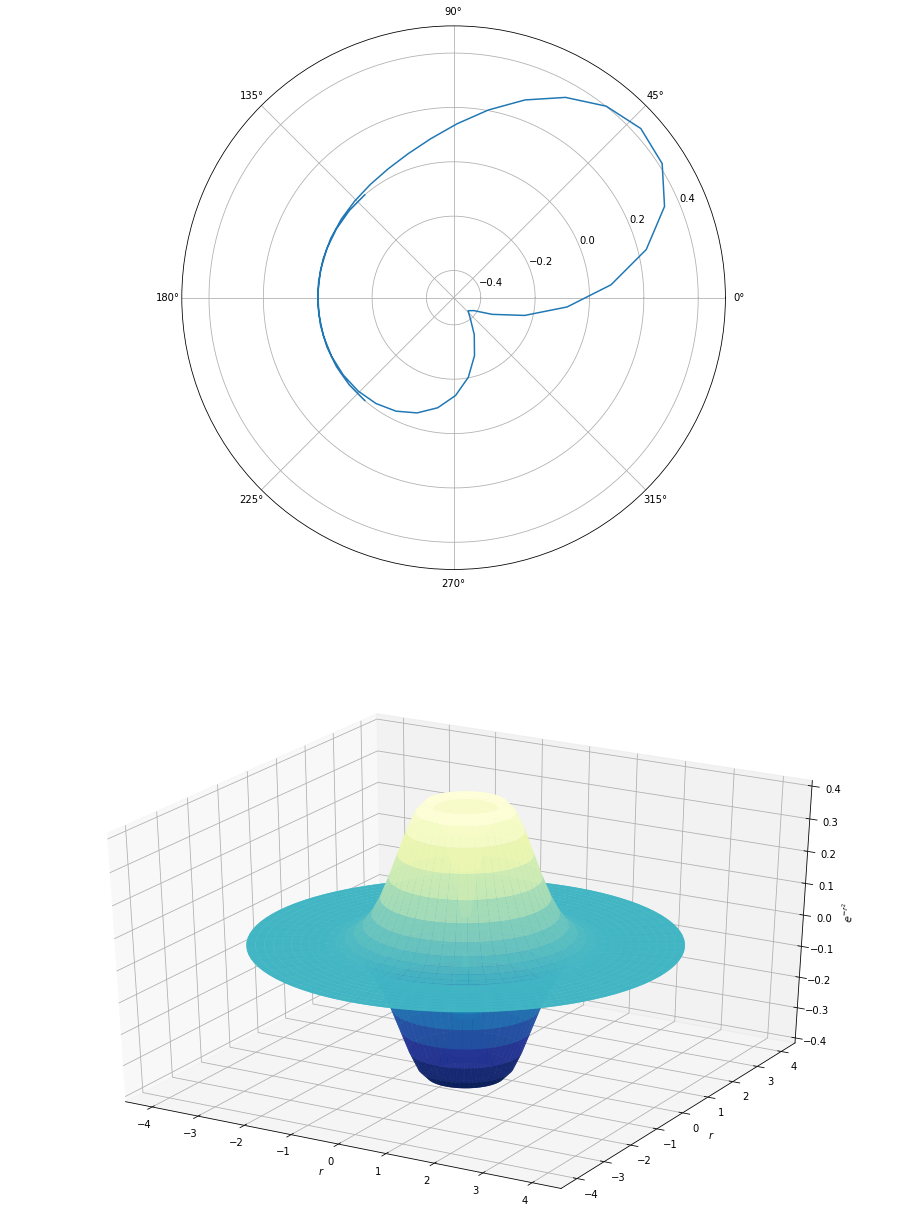

In [5]:
# Playing with Polar Coordinates

fig = plt.figure(figsize=A)

# First subplot
ax = fig.add_subplot(2, 1, 1, projection='polar')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(-4, 4, 50)
p = np.linspace(0, 2*np.pi, 50)
ax.plot(r, r*np.exp(-r**2))
ax.set_rlim(-0.5,0.5)
R, P = np.meshgrid(r, p)
Z = (R*np.exp(-R**2))

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, alpha=0.9)

# Tweak the limits and add latex math labels.
ax.set_zlim(-0.4, 0.4)
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$r$')
ax.set_zlabel(r'$e^{-r^2}$')

plt.show()